In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\西新宿 自動運転アンケート2025.2.21~24.csv　108名バージョン\西新宿 自動運転アンケート2025.2.21~24.csv")
df_copy = df.copy()
df_copy.columns = [
    "timestamp", "Q1-1_attribute_Sex", "Q1-1_attribute_Age", "Q1-2_position", "Q1-3_region",
    "Q1-4_past_autonomous_bus", "Q2-1_reuse_intent", "Q2-2_reason_reuse", "Q2-2_reason_no_reuse",
    "Q2-3_usage_frequency", "Q3-1_fare_willingness", "Q4-1_safety_concern", "Q4-2_safety_situation",
    "Q5-1_participation_reason", "Q5-2_info_source", "Q5-3_riding_comfort", "Q5-3_comfort_reason",
    "Q5-4_expectation_future", "Q5-4_expectation_reason",
    "Q6-1-a_beneficiary_parking", "Q6-1-b_non_beneficiary_parking",
    "Q6-2-a_beneficiary_pedestrian", "Q6-2-b_non_beneficiary_pedestrian",
    "Q6-3-a_beneficiary_speed_adjust", "Q6-3-b_non_beneficiary_speed_adjust",
    "Q6-4-a_beneficiary_financial_burden", "Q6-4-b_non_beneficiary_financial_burden",
    "Q7-1_self_service_acceptance"
]

df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('①希望する', 1)
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('②どちらかというと希望する', 2)
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('③どちらかというと希望しない', 3)
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('④希望しない', 4)

df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('①週５回以上', 1)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('②週３～４回', 2)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('③週１～２回', 3)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('④月に１～３回', 4)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('⑤年に数回以下', 5)

df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('①１００円以下', 1)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('②１５０円', 2)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('③２００円', 3)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('④２５０円', 4)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('⑤３００円', 5)

df_copy.iloc[:, 11] = df_copy.iloc[:, 11].replace('①危険を感じた', 1)
df_copy.iloc[:, 11] = df_copy.iloc[:, 11].replace('②危険を感じなかった', 2)

df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('①興味本位', 1)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('②家族・友人に誘われたから', 2)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('③試しに乗ってみた（視察含む）', 3)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑤自動運動システムに興味があった', 5)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑥通勤（都庁）', 6)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑦通勤（都庁以外）', 7)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑧業務', 8)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑨趣味・コミュニティ活動', 9)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑩通院/健康関係', 10)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑪行政機関利用', 11)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑫金融/郵便関係利用', 12)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑬外食', 13)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑭日用品の購入', 14)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑮（日用品を除く）物品の購入/サービス契約', 15)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑯仕事以外の方（知人/友人/家族等）の面会', 16)

df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('②やや協力できる', 2)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('③普通', 3)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('④やや協力できない', 4)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('②やや協力できる', 2)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('③普通', 3)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('④やや協力できない', 4)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('②やや協力できる', 2)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('③普通', 3)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('④やや協力できない', 4)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('②やや協力できる', 2)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('③普通', 3)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('④やや協力できない', 4)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('②やや協力できる', 2)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('③普通', 3)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('④やや協力できない', 4)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('②やや協力できる', 2)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('③普通', 3)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('④やや協力できない', 4)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('②やや協力できる', 2)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('③普通', 3)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('④やや協力できない', 4)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('②やや協力できる', 2)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('③普通', 3)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('④やや協力できない', 4)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:,1] = df_copy.iloc[:,1].replace({'男性': 1, '女性': 2, '無回答': 0})
df_copy.iloc[:,2] = df_copy.iloc[:,2].replace({'10代未満': 5.0, '10代': 15, '20代': 25, '30代': 35, '40代': 45, '50代': 55, '60代': 65, '70代以上': 75})
df_copy.iloc[:,4] = df_copy.iloc[:,4].replace({'神奈川県': 1, 'その他': 0, '東京都（23区以外）': 2, '23区（新宿区以外）': 3, '新宿区': 4})

df_copy.iloc[:, 3] = df_copy.iloc[:, 3].replace('関係者', 1)
df_copy.iloc[:, 3] = df_copy.iloc[:, 3].replace('他地域からの来訪者', 2)
df_copy.iloc[:, 3] = df_copy.iloc[:, 3].replace('地域住民', 3)

df_copy.iloc[:, 5] = df_copy.iloc[:, 5].replace('今回試乗していない', 1)
df_copy.iloc[:, 5] = df_copy.iloc[:, 5].replace('初めて参加した', 2)
df_copy.iloc[:, 5] = df_copy.iloc[:, 5].replace('1回参加した', 3)
df_copy.iloc[:, 5] = df_copy.iloc[:, 5].replace('複数回参加した', 4)

df_copy.iloc[:, 15] = df_copy.iloc[:, 15].replace('⑤不満', 5)
df_copy.iloc[:, 15] = df_copy.iloc[:, 15].replace('④やや不満', 4)
df_copy.iloc[:, 15] = df_copy.iloc[:, 15].replace('③普通', 3)
df_copy.iloc[:, 15] = df_copy.iloc[:, 15].replace('②やや満足', 2)
df_copy.iloc[:, 15] = df_copy.iloc[:, 15].replace('①満足', 1)

df_copy = df_copy.fillna(0)

C:\Users\sk062\AppData\Local\Temp\ipykernel_11420\377918449.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('④希望しない', 4)
C:\Users\sk062\AppData\Local\Temp\ipykernel_11420\377918449.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('⑤年に数回以下', 5)
C:\Users\sk062\AppData\Local\Temp\ipykernel_11420\377918449.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [3]:
# 説明変数
print(df_copy.iloc[:, [1,2,3,4,5,6,9,10,11,15,19,20,21,22,23,24,25,26]].squeeze().dtypes)

Q1-1_attribute_Sex                           int64
Q1-1_attribute_Age                         float64
Q1-2_position                                int64
Q1-3_region                                  int64
Q1-4_past_autonomous_bus                     int64
Q2-1_reuse_intent                          float64
Q2-3_usage_frequency                       float64
Q3-1_fare_willingness                      float64
Q4-1_safety_concern                        float64
Q5-3_riding_comfort                        float64
Q6-1-a_beneficiary_parking                   int64
Q6-1-b_non_beneficiary_parking               int64
Q6-2-a_beneficiary_pedestrian                int64
Q6-2-b_non_beneficiary_pedestrian            int64
Q6-3-a_beneficiary_speed_adjust              int64
Q6-3-b_non_beneficiary_speed_adjust          int64
Q6-4-a_beneficiary_financial_burden          int64
Q6-4-b_non_beneficiary_financial_burden      int64
dtype: object


In [11]:
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].map(lambda x: 1 if x == 2 else 0 if x in [3, 4] else x)
df_copy.iloc[:, 6].unique()

array([0., 1.])

In [12]:
Y = df_copy.iloc[:,6]
X = df_copy.iloc[:, [1,2,3,4,5,6,9,10,11,15,19,20,21,22,23,24,25,26]]

In [13]:
# 切片を追加
X = sm.add_constant(X)

# ロジスティック回帰の実行
logit_model = sm.Logit(Y, X).fit()

# 結果を表示
logit_model.summary()

         Current function value: 0.000359
         Iterations: 35


C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Q2-1_reuse_intent   No. Observations:                  108
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                           18
Date:                Sun, 02 Mar 2025   Pseudo R-squ.:                  0.9995
Time:                        22:48:56   Log-Likelihood:              -0.038765
converged:                      False   LL-Null:                       -72.997
Covariance Type:            nonrobust   LLR p-value:                 4.605e-22
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     -34.7920   7.35e+04     -0.000      1.000   -1.44e+05    1.44e+05
Q1-1_attribute_Sex                          2.5730   2.23e+04      0.000      1.000   -4.38e+04    4.38e+04
Q1-1_attribute_Age                          0.1864    363.854      0.001      1.000    -712.953     713.326
Q1-2_position                              -1.6378    1.3e+04     -0.000      1.000   -2.54e+04    2.54e+04
Q1-3_region                                 2.3209   3822.274      0.001      1.000   -7489.198    7493.839
Q1-4_past_autonomous_bus                   -2.9154   9557.779     -0.000      1.000   -1.87e+04    1.87e+04
Q2-1_reuse_intent                          49.4351   2.53e+04      0.002      0.998   -4.95e+04    4.96e+04
Q2-3_usage_frequency                        0.7339   4967.859      0.000      1.000   -9736.092    9737.560
Q3-1_fare_willingness                      -0.3764   5472.400  -6.88e-05      1.000   -1.07e+04    1.07e+04
Q4-1_safety_concern                         1.3898   5854.029      0.000      1.000   -1.15e+04    1.15e+04
Q5-3_riding_comfort                         3.6782   3654.496      0.001      0.999   -7159.002    7166.359
Q6-1-a_beneficiary_parking                  7.9858   1.29e+04      0.001      1.000   -2.52e+04    2.52e+04
Q6-1-b_non_beneficiary_parking             -3.5586   1.12e+04     -0.000      1.000    -2.2e+04    2.19e+04
Q6-2-a_beneficiary_pedestrian              -2.8455   7034.962     -0.000      1.000   -1.38e+04    1.38e+04
Q6-2-b_non_beneficiary_pedestrian          -3.7379   7960.790     -0.000      1.000   -1.56e+04    1.56e+04
Q6-3-a_beneficiary_speed_adjust             2.8000   5135.431      0.001      1.000   -1.01e+04    1.01e+04
Q6-3-b_non_beneficiary_speed_adjust         1.1727   5306.760      0.000      1.000   -1.04e+04    1.04e+04
Q6-4-a_beneficiary_financial_burden        -1.5606   9838.580     -0.000      1.000   -1.93e+04    1.93e+04
Q6-4-b_non_beneficiary_financial_burden    -0.7256   1.09e+04  -6.67e-05      1.000   -2.13e+04    2.13e+04
===========================================================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
# データをトレーニングセットとテストセットに分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# 特徴量のスケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, max_iter=1000, solver='liblinear')

In [19]:
# 回帰係数と標準誤差を確認する
coefficients = model.coef_[0]
intercept = model.intercept_

# 回帰係数を表示
print("回帰係数:", coefficients)
print("切片:", intercept)

回帰係数: [ 0.         -0.13885669  0.19043804 -0.14405245 -0.00794214  0.12043412
  3.42893859  0.76822396  0.0171341   0.2782456   0.30913023  0.08568562
 -0.14598025 -0.0793837  -0.33276625  0.02764213  0.09556427 -0.147432
  0.16477822]
切片: [0.67394028]


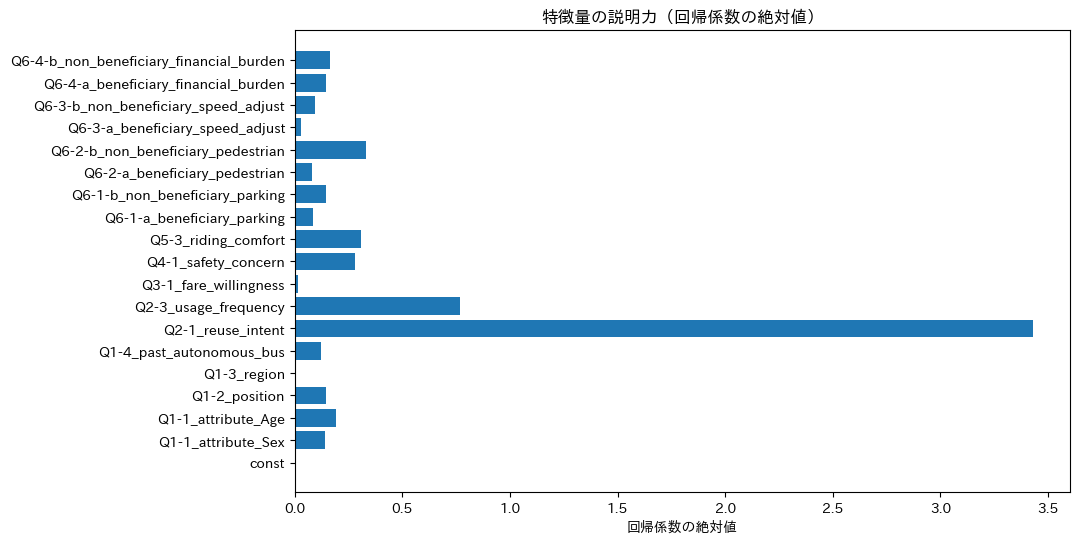

In [20]:
# 各特徴量の回帰係数の絶対値をプロット
plt.figure(figsize=(10, 6))
plt.barh(X.columns, np.abs(coefficients))
plt.xlabel("回帰係数の絶対値")
plt.title("特徴量の説明力（回帰係数の絶対値）")
plt.show()

In [21]:
# モデルのパフォーマンスを評価
y_pred = model.predict(X_test_scaled)

# モデルの精度や他の評価指標を表示
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

